In [43]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
##Load the dataset into python environment
##Make ‘PassengerId’ as the index column
data=pd.read_csv('titanic_dataset.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
##Check the basic details of the dataset

data.shape

(891, 11)

In [46]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [48]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
## Fill in all the missing values present in all the columns in the dataset

##Check the missing values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [50]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [52]:
## Dropping Cabin as 77% data is missing
data.drop('Cabin',axis=1, inplace=True)

In [53]:
##Dropping all irrelevant columns
data.drop(['Name','Ticket', 'Embarked', 'Sex'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [54]:
## Filling missing values of Age with Median
for col in ['Age']:
  data[col]=data[col].fillna(data[col].median())
data.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

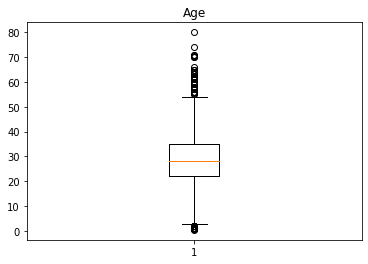

In [55]:
## Finding outliers
plt.boxplot(data['Age'])
plt.title('Age')
plt.show()

In [56]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [57]:
IQR=Q3-Q1

In [58]:
## Giving 3 times as age of 1.5 times will remove relevant data
low_lim=Q1-(3*IQR)
upp_lim=Q3+(3*IQR)
print(low_lim)
print(upp_lim)

-17.0
74.0


In [59]:
outliers=[]
for i in data['Age']:
  if (i>upp_lim) or (i<low_lim):
    outliers.append(i)

In [60]:
outliers

[80.0]

In [61]:
ind=data['Age']>upp_lim
data.loc[ind].index

Int64Index([631], dtype='int64', name='PassengerId')

In [62]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
## Method 1. Dropping outlier
data= data.drop([631])

In [64]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,0.383146,2.310112,29.304685,0.523596,0.382022,32.206685
std,0.486427,0.835388,12.915708,1.103224,0.806409,49.721315
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


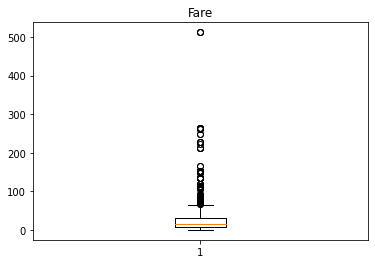

In [65]:
##Finding outlier in Fare
plt.boxplot(data['Fare'])
plt.title('Fare')
plt.show()

In [66]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [67]:
IQR = Q3 - Q1
IQR

23.0896

In [68]:
low_lim=Q1-(1.5*IQR)
upp_lim=Q3+(1.5*IQR)
print(low_lim)
print(upp_lim) 

-26.724
65.6344


In [69]:
outliers=[]
for i in data['Fare']:
  if (i>upp_lim) or (i<low_lim):
    outliers.append(i)

In [70]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [71]:
ind=data['Fare']>upp_lim
data.loc[ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [72]:
## Method 2: Capping values greater than upper_whisker to upper_whisker
data['Fare']=np.where(data['Fare']>upp_lim,upp_lim,data['Fare'])

In [73]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,0.383146,2.310112,29.304685,0.523596,0.382022,24.040124
std,0.486427,0.835388,12.915708,1.103224,0.806409,20.492167
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,74.000000,8.000000,6.000000,65.634400


In [74]:
data.nunique()

Survived      2
Pclass        3
Age          87
SibSp         7
Parch         7
Fare        204
dtype: int64

In [75]:
##Do min max scaling on the feature set (Take ‘Survived’ as target)
from sklearn.preprocessing import MinMaxScaler

In [76]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [77]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,65.6344
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,28.0,1,2,23.4500


In [78]:
data1 = data.drop('Survived', axis=1)
data1

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,65.6344
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [79]:
data.drop(['Pclass',	'Age', 'SibSp' ,'Parch', 'Fare'],axis=1, inplace=True)
data

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [80]:
data1 = min_max_scaler.fit_transform(data1)

In [81]:
type(data1)

numpy.ndarray

In [82]:
data1 = pd.DataFrame(data1,columns=['Pclass',	'Age', 'SibSp' ,'Parch', 'Fare' ])
data1

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.293286,0.125,0.000000,0.110460
1,0.0,0.510737,0.125,0.000000,1.000000
2,1.0,0.347649,0.000,0.000000,0.120745
3,0.0,0.469965,0.125,0.000000,0.809027
4,1.0,0.469965,0.000,0.000000,0.122649
...,...,...,...,...,...
885,0.5,0.361239,0.000,0.000000,0.198067
886,0.0,0.252514,0.000,0.000000,0.457077
887,1.0,0.374830,0.125,0.333333,0.357282
888,0.0,0.347649,0.000,0.000000,0.457077


In [ ]:
data = pd.concat([data,data1], axis=1)
data